# Instacart Users Segmentation and Market Basket Analysis

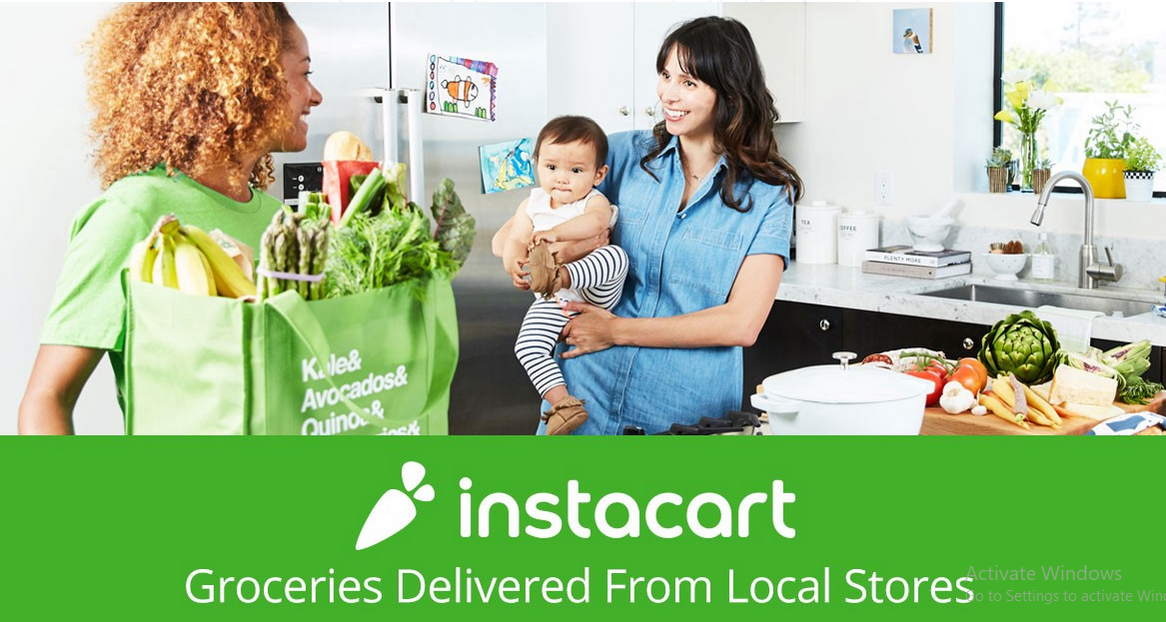

In [1]:
from IPython.display import Image
Image(filename='C:/Users/Biswas/Pictures/Screenshots/Instacart1.png')

## Introduction

Covid-19 has been a world spread pandemic since 2020. Thus,we all around glob follow the quarantine policy and keep a social distance from each other. As we know, COVID-19 spread through community transmission. Therefore, going out to get daily essential commodities become a headache issue for all of us. People in grocery stores are not practical to keep a social distance. During Covid-19 outbreaks, we all are going through Lockdown, which increases the demand for online grocery shopping. **Instacart**, a grocery ordering and delivery app,that has experienced rapid growth during the Covid-19 crisis. Customers select the products through the **Instacart app** with the touch of a button, personal shoppers review the order and do the in-store shopping and delivery for customers. We can think of Instacart as the Uber for grocery shopping. Now, users gain the value of staying home to flatten the curve and to reduce their own risk of getting the virus.

The primary research goals are doing **user segmentation based on time intervals** and **predict which previously purchased products will be in a user’s next order**, **which Sets of Products Should be recommended to shoppers.** The expectation of the research could optimize the Supply side’s inventory allocation and increase the probability that customers get essential goods without breaking the social distancing rule.



Back in 2017, the company announced its first public dataset release, which is anonymized and contains a sample of over **3 million** grocery orders from more than **200,000 Instacart** users.  It contains the **order file**, **product file**, **order & product prior & train file**, **aisles file**, and **department file**. Each entity in the dataset has an associated **unique id**.

Let's explore the datasets.

## Exploratory Data Analysis

### Import necessary libraries.

In [2]:
import pandas as pd #very useful to create dataframe by reading data files in any format .csv, .json, .xlsx etc.
import numpy as np #for accessing numpy arrays
#visualization purpose
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,7
color = sns.color_palette()
#sns.set_style('darkgrid')

#Visualization in word cloud of different categories of categorical variables
from wordcloud import WordCloud
import plotly.graph_objs as go
from collections import Counter
from nltk.corpus import stopwords

#ignore annoying warning (from sklearn and seaborn)
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

#for some statistics
from scipy import stats
from scipy.stats import norm, skew 

#Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x)) 



### Products

Firstly, let’s explore the data for Instacart products. There are 2 CSV files, namely **order_products_train** and **order_products_prior**, that specify which products were purchased in each order. More specifically, **order_products_prior** contains previous order products for all customers and order_products_train contains the latest order products for some customers only.

In [3]:
order_product_train=pd.read_csv('C:/Users/Biswas/Desktop/order_products__train.csv')
print(order_product_train.shape)
features_train=list(order_product_train.columns)
print(features_train)
order_product_train.head(10)


(1384617, 4)
['order_id', 'product_id', 'add_to_cart_order', 'reordered']


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [4]:
order_product_train.describe()

,order_id,product_id,add_to_cart_order,reordered
count,1384617.0000,1384617.0000,1384617.0000,1384617.0000
mean,1706297.6211,25556.2357,8.7580,0.5986
std,989732.6489,14121.2724,7.4239,0.4902
min,1.0000,1.0000,1.0000,0.0000
25%,843370.0000,13380.0000,3.0000,0.0000
50%,1701880.0000,25298.0000,7.0000,1.0000
75%,2568023.0000,37940.0000,12.0000,1.0000
max,3421070.0000,49688.0000,80.0000,1.0000


In [5]:
#len(order_product_train['order_id'].unique())

In [6]:
order_products_prior=pd.read_csv('C:/Users/Biswas/Desktop/order_products__prior.csv')
print(order_products_prior.shape)
print(order_products_prior.columns)
order_products_prior.head(10)

(32434489, 4)
Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [7]:
order_products_prior.describe()

,order_id,product_id,add_to_cart_order,reordered
count,32434489.0000,32434489.0000,32434489.0000,32434489.0000
mean,1710748.5189,25576.3375,8.3511,0.5897
std,987300.6965,14096.6891,7.1267,0.4919
min,2.0000,1.0000,1.0000,0.0000
25%,855943.0000,13530.0000,3.0000,0.0000
50%,1711048.0000,25256.0000,6.0000,1.0000
75%,2565514.0000,37935.0000,11.0000,1.0000
max,3421083.0000,49688.0000,145.0000,1.0000


### Conclusion: 

There are 1,384,617 products in the order_products_train file and 32,434,489 products in the order_products_prior file. Both files have 4 features:

 *   The ID of the order (order_id)
 *   The ID of the product (product_id)
 *   The ordering of that product in the order (add_to_cart_order)
 *   Whether that product was reordered (reordered).

In [8]:
print('In order_product_train file there are {} unique orders for {} unique product'.format(len(order_product_train['order_id'].unique()),len(order_product_train['product_id'].unique())))

In order_product_train file there are 131209 unique orders for 39123 unique product


In [9]:
print('In order_products_prior file there are {} unique orders for {} unique product'.format(len(order_products_prior['order_id'].unique()),len(order_products_prior['product_id'].unique())))

In order_products_prior file there are 3214874 unique orders for 49677 unique product


### Checking  Missing Values for these two datasets 'order_products_prior', 'order_product_train'

In [10]:
order_product_train.isnull().mean()

order_id            0.0000
product_id          0.0000
add_to_cart_order   0.0000
reordered           0.0000
dtype: float64

In [11]:
order_products_prior.isnull().mean()

order_id            0.0000
product_id          0.0000
add_to_cart_order   0.0000
reordered           0.0000
dtype: float64

### Conclusion:

There is no missing value in these two files 'order_product_train','order_products_prior'

### Find Data Types Of Columns

In [12]:
order_product_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [13]:
order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 989.8 MB


### Conclusion

So, all features of these two datasets are numerical and integer type

### Print All Numerical Columns Using List Comprehension

In [14]:
Num_feature_train=[feature for feature in features_train if order_product_train[feature].dtypes!='O']
Num_feature_train

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [15]:
Num_feature_prior=[feature for feature in features_train if order_products_prior[feature].dtypes!='O']
Num_feature_prior

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [16]:
products=pd.read_csv('C:/Users/Biswas/Desktop/products.csv')
print(products.shape)
print('There are {} unique products are in product csv file'.format(len(products['product_id'].unique())))
products.head(10)

(49688, 4)
There are 49688 unique products are in product csv file


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


Overall, there are 3,346,083 unique orders for 49688 unique products. We can observe in the plot below that people usually order around 5 products.

### Checking missing values of 'products'  dataset

In [17]:
products.isnull().mean()

product_id      0.0000
product_name    0.0000
aisle_id        0.0000
department_id   0.0000
dtype: float64

### Conclusion

There is no missing values in products file

### Find datatypes

In [18]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### Numerical Features For Product Data

In [19]:
Num_feature_prod=[feature for feature in products if products[feature].dtype!='O']
Num_feature_prod

['product_id', 'aisle_id', 'department_id']

### Categorical Features For Product Data

In [20]:
Cat_feature_prod=[feature for feature in products if products[feature].dtype=='O']
Cat_feature_prod

['product_name']

### Let's Explore remaining three datasets 'Order', 'Department', 'Aisles'

### Order Data

In [21]:
orders=pd.read_csv('C:/Users/Biswas/Desktop/orders.csv')
print(orders.shape)
print(orders.info())
print(orders.columns)
orders.head(10)

(3421083, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None
Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0000
2,473747,1,prior,3,3,12,21.0000
3,2254736,1,prior,4,4,7,29.0000
4,431534,1,prior,5,4,15,28.0000
5,3367565,1,prior,6,2,7,19.0000
6,550135,1,prior,7,1,9,20.0000
7,3108588,1,prior,8,1,14,14.0000
8,2295261,1,prior,9,1,16,0.0000
9,2550362,1,prior,10,4,8,30.0000


### Numerical Features for Order Data

In [22]:
Num_feature_order=[feature for feature in orders if orders[feature].dtypes!='O']
Num_feature_order

['order_id',
 'user_id',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

### Categorical Features for Order Data

In [23]:
Cat_feature_order=[feature for feature in orders if orders[feature].dtypes=='O']
Cat_feature_order

['eval_set']

In [24]:
len(orders['order_id'].unique())

3421083

In [25]:
orders.isnull().mean()

order_id                 0.0000
user_id                  0.0000
eval_set                 0.0000
order_number             0.0000
order_dow                0.0000
order_hour_of_day        0.0000
days_since_prior_order   0.0603
dtype: float64

### Conclusion

So, only 'days_since_prior_order' has 0.0603% missing values in Orders data. Before droping the missing values 1st we have to check whether is there any relationship between 'days_since_prior_order' feature and our target variable '' We will handle this in feature engineering part of this notebook. 

### Department Data

In [26]:
departments=pd.read_csv('C:/Users/Biswas/Desktop/departments.csv')
print(departments.shape)
print(departments.columns)
departments.head()

(21, 2)
Index(['department_id', 'department'], dtype='object')


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [27]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [28]:
departments.isnull().mean()

department_id   0.0000
department      0.0000
dtype: float64

In [29]:
len(departments['department'].unique())

21

### Conclusion

So, in department dataset there is only two features one is numerical that is 'department id' & another is name of departments and 21 different types of departments and no missing values.

### Aisles Data

In [30]:
aisles=pd.read_csv('C:/Users/Biswas/Desktop/aisles.csv')
print(aisles.shape)
print(aisles.columns)
print(aisles.info())
aisles.head(10)

(134, 2)
Index(['aisle_id', 'aisle'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


In [31]:
print(len(aisles['aisle'].unique()))

134


### Conclusion

So, in Aisles dataset there is only two features one is numerical that is 'aisle_id' & another is name of aisles and 134 different types of departments and no missing values.

## Data Preprocessing

In [32]:
order_prior_train = pd.concat((order_product_train, order_products_prior)).reset_index(drop=True)
order_prior_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
33819101,3421083,39678,6,1
33819102,3421083,11352,7,0
33819103,3421083,4600,8,0
33819104,3421083,24852,9,1


In [33]:
types_of_orders=pd.DataFrame(orders['eval_set'].value_counts())
types_of_orders

,eval_set
prior,3214874
train,131209
test,75000


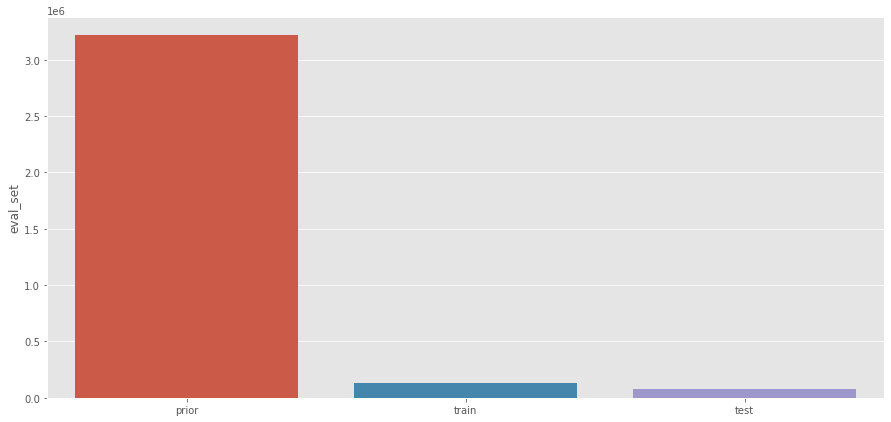

In [34]:
sns.barplot(x=types_of_orders.index,y=types_of_orders['eval_set'])
plt.show()

In [35]:
order_train=orders[orders['eval_set']=='train']
order_prior=orders[orders['eval_set']=='prior']

In [36]:
order_train['eval_set'].value_counts()

train    131209
Name: eval_set, dtype: int64

In [37]:
order_prior['eval_set'].value_counts()

prior    3214874
Name: eval_set, dtype: int64

In [38]:
order_prio_trai = pd.concat((order_prior,order_train)).reset_index(drop=True)
order_prio_trai

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0000
2,473747,1,prior,3,3,12,21.0000
3,2254736,1,prior,4,4,7,29.0000
4,431534,1,prior,5,4,15,28.0000
...,...,...,...,...,...,...,...
3346078,2585586,206199,train,20,2,16,30.0000
3346079,943915,206200,train,24,6,19,6.0000
3346080,2371631,206203,train,6,4,19,30.0000
3346081,1716008,206205,train,4,1,16,10.0000


In [39]:
order_prio_trai['eval_set'].value_counts()

prior    3214874
train     131209
Name: eval_set, dtype: int64

In [40]:
order_prio_trai_copy=order_prio_trai.copy()

In [41]:
order_prio_trai = pd.merge(order_prio_trai,order_prior_train, on='order_id', how='left')
order_prio_trai

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
...,...,...,...,...,...,...,...,...,...,...
33819101,272231,206209,train,14,6,14,30.0000,40603,4,0
33819102,272231,206209,train,14,6,14,30.0000,15655,5,0
33819103,272231,206209,train,14,6,14,30.0000,42606,6,0
33819104,272231,206209,train,14,6,14,30.0000,37966,7,0


In [42]:

order_prio_trai = pd.merge(order_prio_trai, products, on='product_id', how='left')
order_prio_trai.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17


In [43]:

order_prio_trai = pd.merge(order_prio_trai, aisles, on='aisle_id', how='left')
order_prio_trai.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,popcorn jerky
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods


In [44]:

order_prio_trai = pd.merge(order_prio_trai,departments, on='department_id', how='left')
order_prio_trai.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household


In [64]:
order_prio_trai['order_dow'].value_counts()

0    6533692
1    5871834
6    4707583
5    4386443
2    4378360
3    3998498
4    3942696
Name: order_dow, dtype: int64

In [65]:
order_prio_trai['order_number'].value_counts()

1      2078068
3      2050731
2      2048332
4      1970180
5      1751959
        ...   
96       14215
97       13691
98       13150
99       12686
100       7624
Name: order_number, Length: 100, dtype: int64

In [66]:
order_prio_trai['days_since_prior_order'].value_counts()

1    33819106
Name: days_since_prior_order, dtype: int64

#### All features of this merged dataframe

In [54]:
merge_features=list(order_prio_trai.columns)

#### Numerical Features Of merged dataframe

In [56]:
num_merge_feature=[feature for feature in merge_features if order_prio_trai[feature].dtype!='O']
num_merge_feature

['order_id',
 'user_id',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order',
 'product_id',
 'add_to_cart_order',
 'reordered',
 'aisle_id',
 'department_id']

#### Select Numerical Features Except Id's

In [58]:
num_merge_feature_exid=['order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order','add_to_cart_order']

#### Categorical Features Of Mereged DataFrame

In [57]:
Cat_merge_feature=[feature for feature in merge_features if order_prio_trai[feature].dtype=='O']
Cat_merge_feature

['eval_set', 'product_name', 'aisle', 'department']

### Feature Engineering

#### Feature selection Using Spearman Correlation matrix

In [61]:
#corrmat = order_prio_trai[num_merge_feature_exid].corr()
#f, ax = plt.subplots(figsize=(25,20))
#sns.heatmap(corrmat, vmax=.8,annot = True, square=True);

order_prio_trai.isnull().mean()

order_id                 0.0000
user_id                  0.0000
eval_set                 0.0000
order_number             0.0000
order_dow                0.0000
order_hour_of_day        0.0000
days_since_prior_order   0.0000
product_id               0.0000
add_to_cart_order        0.0000
reordered                0.0000
product_name             0.0000
aisle_id                 0.0000
department_id            0.0000
aisle                    0.0000
department               0.0000
dtype: float64

### Handling Missing Value

Let's clean our data.

To do this we have to first check whether there is any relation between missing values that is in this case 'days_since_prior_order' and our target variable.Because if we simply remove those rows which contain NaN value then we loss information and it will be put very bad effect on our classification model if there is a strong relationship between target feature and the independent feature which contain missing value. That's why we have to first check whether there is any relationship between 'days_since_prior_order' and target variable 'reordered'.

In [53]:
median_val=order_prio_trai['days_since_prior_order'].median()
print(median_val)
order_prio_trai['days_since_prior_order']=order_prio_trai['days_since_prior_order'].fillna(median_val)
order_prio_trai.head()



1.0


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,1,196,1,0,Soda,77,7,soft drinks,beverages
1,2539329,1,prior,1,2,8,1,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,1,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,1,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,1,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household


In [63]:
order_prio_trai['days_since_prior_order'].value_counts()

1    33819106
Name: days_since_prior_order, dtype: int64

In [67]:
orders.rename(columns = {'order_dow':'Weekdays','order_hour_of_day':'Time Of Day'}, inplace = True)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [58]:
order_test=orders[orders['eval_set']=='test']
order_test

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0000
44,329954,4,test,6,3,12,30.0000
53,1528013,6,test,4,3,16,22.0000
96,1376945,11,test,8,6,11,8.0000
102,1356845,12,test,6,1,20,30.0000
...,...,...,...,...,...,...,...
3420918,2728930,206202,test,23,2,17,6.0000
3420929,350108,206204,test,5,4,14,14.0000
3421001,1043943,206206,test,68,0,20,0.0000
3421018,2821651,206207,test,17,2,13,14.0000


### Handling Missing Values For Order Data

In [ ]:
orders=orders['order_product_train']

In [19]:
median=orders.order_dow.median()
median

3.0

In [20]:
median1=orders.order_hour_of_day.median()
median1

13.0

In [21]:
orders['order_dow']=orders['order_dow'].fillna(median)
orders['order_dow']

0          2
1          3
2          3
3          4
4          4
          ..
3421078    5
3421079    4
3421080    1
3421081    1
3421082    6
Name: order_dow, Length: 3421083, dtype: int64

In [22]:
orders['order_hour_of_day']=orders['order_hour_of_day'].fillna(median1)
orders['order_hour_of_day']

0           8
1           7
2          12
3           7
4          15
           ..
3421078    18
3421079    10
3421080    12
3421081    12
3421082    14
Name: order_hour_of_day, Length: 3421083, dtype: int64

In [23]:
orders.rename(columns = {'order_dow':'Weekdays','order_hour_of_day':'Time Of Day'}, inplace = True)

In [24]:
orders['Weekdays'] =orders['Weekdays'].map( {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}).astype(str)

In [25]:
types_of_orders=pd.DataFrame(orders['eval_set'].value_counts())
types_of_orders

,eval_set
prior,3214874
train,131209
test,75000


In [26]:
rcParams['figure.figsize'] = 15,12

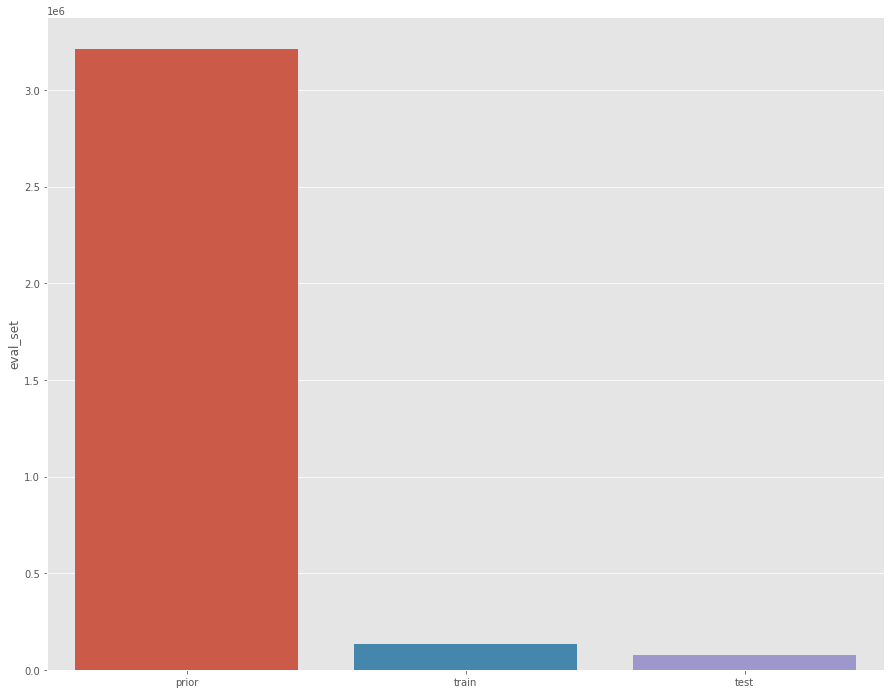

In [27]:
sns.barplot(x=types_of_orders.index,y=types_of_orders['eval_set'])
plt.show()

### No. Of Orders are done in each weekdays

In [28]:
#order_dow=orders[['order_id','Weekdays']].groupby('Weekdays').count()
#order_dow

In [29]:
order_day_of_week=pd.DataFrame(orders.groupby('Weekdays')['order_id'].nunique())
order_day_of_week.columns=['No. of orders in each weekdays']
order_day_of_week.sort_values(by='No. of orders in each weekdays',ascending=False,inplace=True)
order_day_of_week=order_day_of_week.reset_index()
order_day_of_week

,Weekdays,No. of orders in each weekdays
0,Sunday,600905
1,Monday,587478
2,Tuesday,467260
3,Friday,453368
4,Saturday,448761
5,Wednesday,436972
6,Thursday,426339


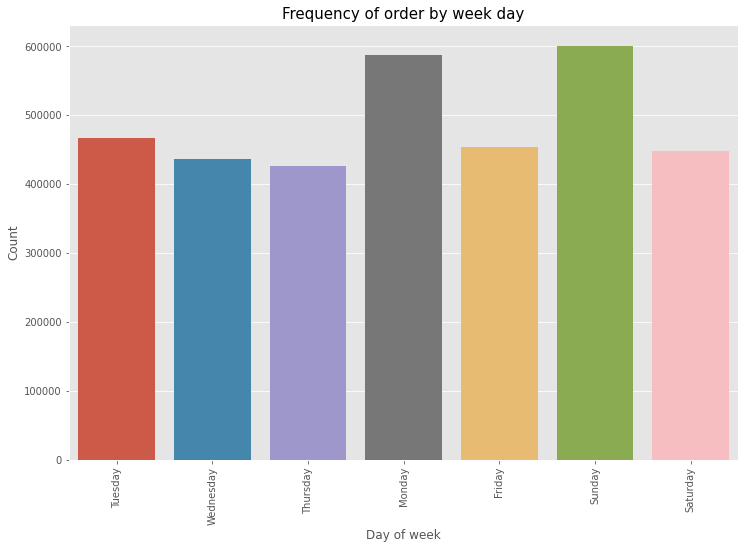

In [30]:
plt.figure(figsize=(12,8))
sns.countplot(x="Weekdays", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

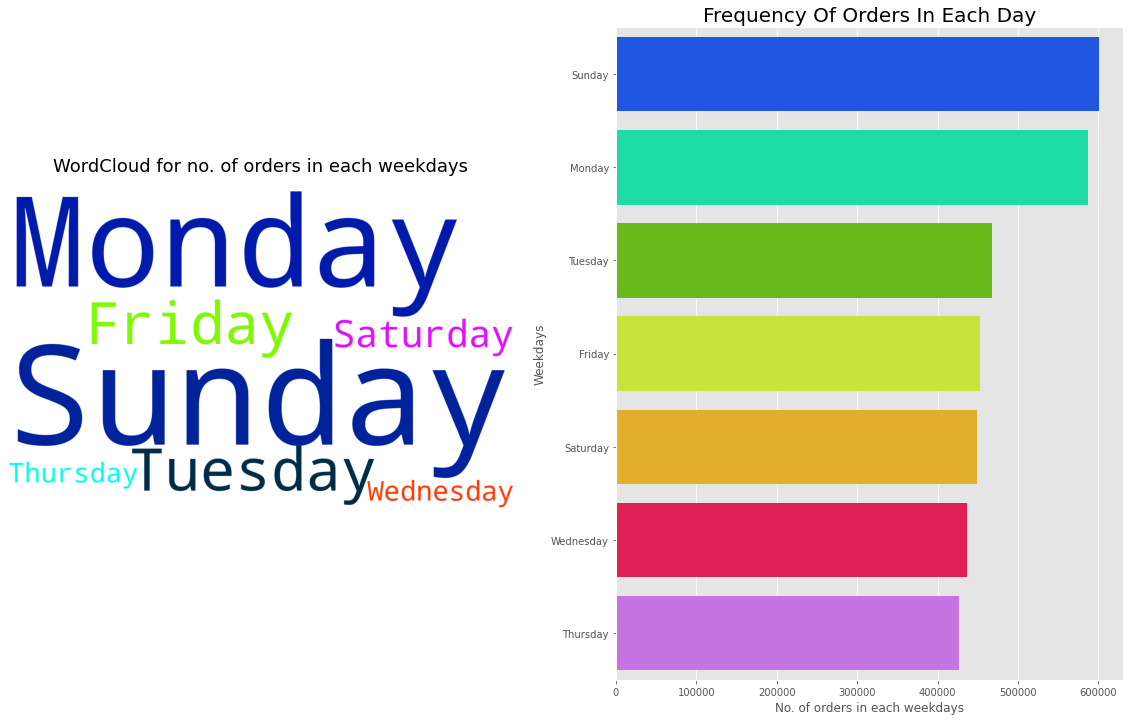

In [31]:
order_weekdays = list(orders['Weekdays'].astype(str).values)
order_weekdays_word_list = []
for lista in [c.split(',') for c in order_weekdays]:
    for word in lista:
        order_weekdays_word_list.append(word.strip())
        

order_weekdays_wc_dict = Counter(order_weekdays_word_list)

wordcloud = WordCloud(width=1280, height=820, collocations=False, random_state=42, 
                      colormap='gist_ncar', background_color='white').generate_from_frequencies(order_weekdays_wc_dict)

fig, axs = plt.subplots(1, 2, figsize=(20, 12))
ax1 = axs[0]
ax2 = axs[1]
ax1.imshow(wordcloud)
ax1.axis('off')
ax1.set_title('WordCloud for no. of orders in each weekdays', size=18, pad=20)
sns.barplot(x=order_day_of_week['No. of orders in each weekdays'],y=order_day_of_week['Weekdays'],palette='gist_ncar',ax=ax2)
ax2.set_title("Frequency Of Orders In Each Day",size=20)
plt.show()

### So, from above visualzation we can conclude that most people purchase commodities specialy on Sunday and Monday & less no. of people does online order through Wednesday

In [32]:
#order_day_of_week1=pd.DataFrame(orders.groupby('Weekdays')['order_number'].sum())
#order_day_of_week1.columns=['No. of orders in each weekdays1']
#order_day_of_week1.sort_values(by='No. of orders in each weekdays1',ascending=False,inplace=True)
#order_day_of_week1=order_day_of_week1.reset_index()
#order_day_of_week1

In [33]:
order_hour_of_day=pd.DataFrame(orders.groupby('Time Of Day')['order_id'].nunique())
order_hour_of_day.columns=['No. of orders in hours']
order_hour_of_day.sort_values(by='No. of orders in hours',ascending=False,inplace=True)
order_hour_of_day=order_hour_of_day.reset_index()
order_hour_of_day['Time Of Day']=order_hour_of_day['Time Of Day'].astype('str')
order_hour_of_day

,Time Of Day,No. of orders in hours
0,10,288418
1,11,284728
2,15,283639
3,14,283042
4,13,277999
5,12,272841
6,16,272553
7,9,257812
8,17,228795
9,18,182912


Text(0.5, 1.0, 'No. of Orders by hour of day')

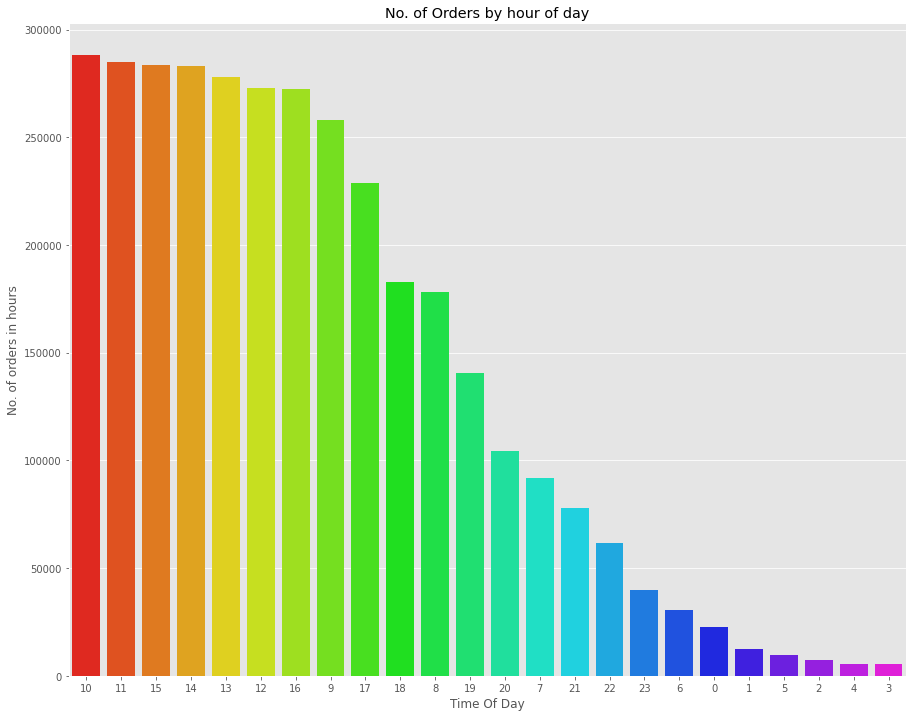

In [34]:
rcParams['figure.figsize'] = 15,12
sns.barplot(x=order_hour_of_day['Time Of Day'], y=order_hour_of_day['No. of orders in hours'],palette='gist_rainbow')
plt.title('No. of Orders by hour of day')

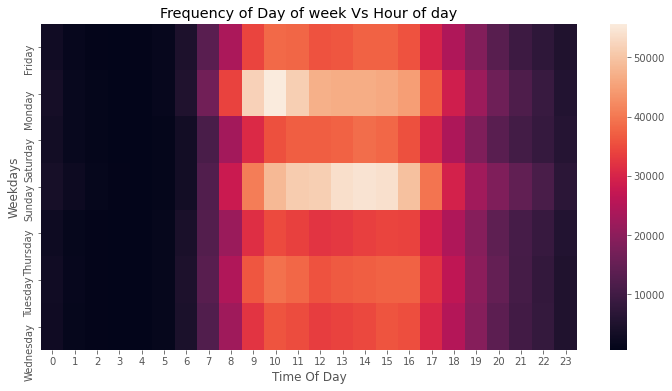

In [35]:
grouped_df = orders.groupby(["Weekdays", "Time Of Day"])["order_id"].nunique().reset_index()
grouped_df = grouped_df.pivot('Weekdays', 'Time Of Day', 'order_id')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

In [36]:
#grouped_df = orders.groupby(["Weekdays", "Time Of Day"])["order_id"].aggregate("count").reset_index()
#grouped_df = grouped_df.pivot('Weekdays', 'Time Of Day', 'order_id')

#plt.figure(figsize=(12,6))
#sns.heatmap(grouped_df)
#plt.title("Frequency of Day of week Vs Hour of day")
#plt.show()

### No. Of Orders By Each Customer

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



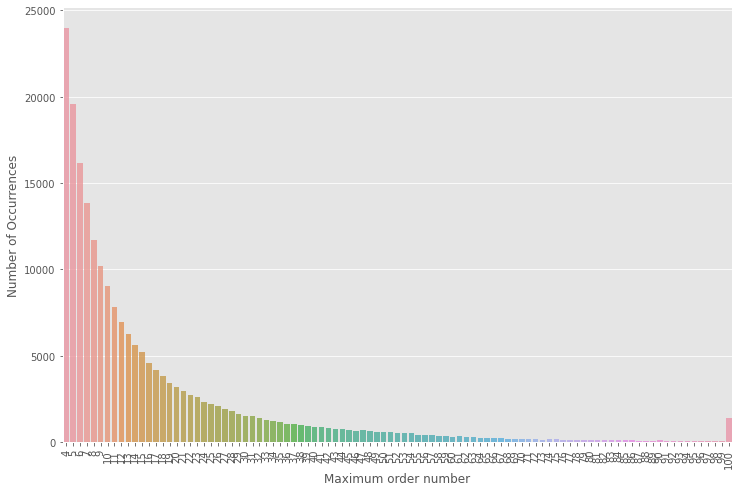

In [37]:
cnt_srs = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()


In [38]:
ordereing_fixed_time_interval=pd.DataFrame(orders.groupby('days_since_prior_order')['order_id'].count())
ordereing_fixed_time_interval.columns = ['Number of Orders']
ordereing_fixed_time_interval.sort_values(by='Number of Orders',ascending=False,inplace=True)
ordereing_fixed_time_interval=ordereing_fixed_time_interval.reset_index()
ordereing_fixed_time_interval['days_since_prior_order']=ordereing_fixed_time_interval['days_since_prior_order'].astype('str')
ordereing_fixed_time_interval

,days_since_prior_order,Number of Orders
0,30.0,369323
1,7.0,320608
2,6.0,240013
3,4.0,221696
4,3.0,217005
5,5.0,214503
6,2.0,193206
7,8.0,181717
8,1.0,145247
9,9.0,118188


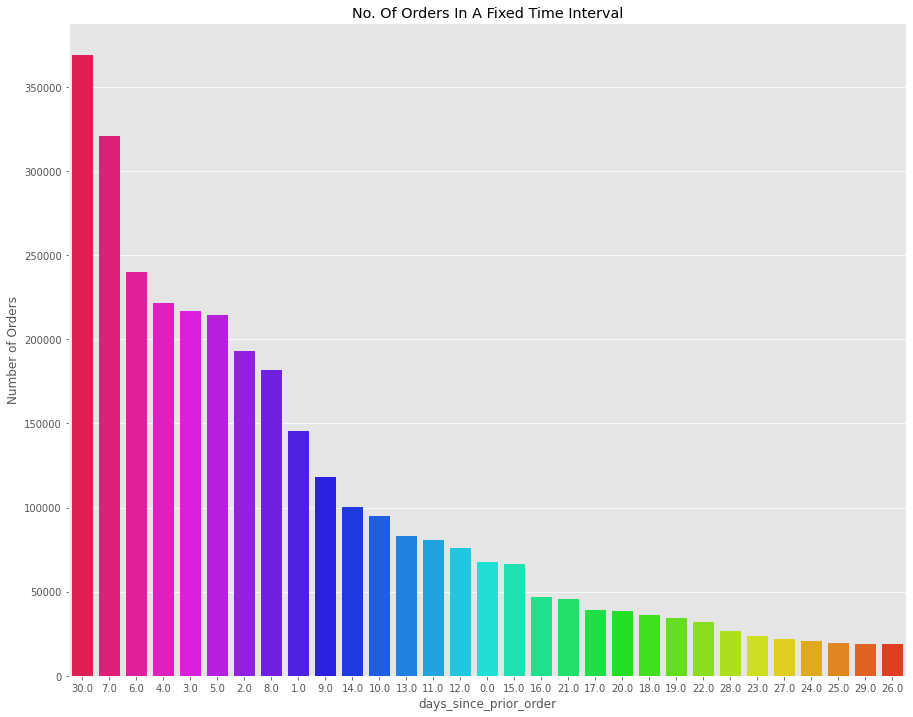

In [39]:
rcParams['figure.figsize'] = 15,12
sns.barplot(x=ordereing_fixed_time_interval['days_since_prior_order'],y=ordereing_fixed_time_interval['Number of Orders'],palette="hsv_r")
plt.title('No. Of Orders In A Fixed Time Interval')
plt.show()

In [40]:
order_prior=orders[orders['eval_set']=='prior']
order_prior

,order_id,user_id,eval_set,order_number,Weekdays,Time Of Day,days_since_prior_order
0,2539329,1,prior,1,Tuesday,8,NaN
1,2398795,1,prior,2,Wednesday,7,15.0
2,473747,1,prior,3,Wednesday,12,21.0
3,2254736,1,prior,4,Thursday,7,29.0
4,431534,1,prior,5,Thursday,15,28.0
...,...,...,...,...,...,...,...
3421077,2558525,206209,prior,9,Thursday,15,22.0
3421078,2266710,206209,prior,10,Friday,18,29.0
3421079,1854736,206209,prior,11,Thursday,10,30.0
3421080,626363,206209,prior,12,Monday,12,18.0


In [41]:
order_train=orders[orders['eval_set']=='train']
order_train

,order_id,user_id,eval_set,order_number,Weekdays,Time Of Day,days_since_prior_order
10,1187899,1,train,11,Thursday,8,14.0
25,1492625,2,train,15,Monday,11,30.0
49,2196797,5,train,5,Sunday,11,6.0
74,525192,7,train,21,Tuesday,11,6.0
78,880375,8,train,4,Monday,14,10.0
...,...,...,...,...,...,...,...
3420838,2585586,206199,train,20,Tuesday,16,30.0
3420862,943915,206200,train,24,Saturday,19,6.0
3420924,2371631,206203,train,6,Thursday,19,30.0
3420933,1716008,206205,train,4,Monday,16,10.0


In [42]:
order_test=orders[orders['eval_set']=='test']
order_test

,order_id,user_id,eval_set,order_number,Weekdays,Time Of Day,days_since_prior_order
38,2774568,3,test,13,Friday,15,11.0
44,329954,4,test,6,Wednesday,12,30.0
53,1528013,6,test,4,Wednesday,16,22.0
96,1376945,11,test,8,Saturday,11,8.0
102,1356845,12,test,6,Monday,20,30.0
...,...,...,...,...,...,...,...
3420918,2728930,206202,test,23,Tuesday,17,6.0
3420929,350108,206204,test,5,Thursday,14,14.0
3421001,1043943,206206,test,68,Sunday,20,0.0
3421018,2821651,206207,test,17,Tuesday,13,14.0


In [43]:
order_products_prior=pd.read_csv('/content/order_products__prior.csv')

In [44]:
order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1.0,1.0
1,2,28985,2.0,1.0
2,2,9327,3.0,0.0
3,2,45918,4.0,1.0
4,2,30035,5.0,0.0
...,...,...,...,...
10412158,1099318,5603,10.0,0.0
10412159,1099318,1940,11.0,0.0
10412160,1099319,29487,1.0,1.0
10412161,1099319,15290,2.0,1.0


In [45]:
order_products_prior_copy=order_products_prior.copy()

In [46]:
order_products_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10412163 entries, 0 to 10412162
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          float64
dtypes: float64(2), int64(2)
memory usage: 317.8 MB


In [47]:
order_products_prior.isnull().mean()

order_id             0.000000e+00
product_id           0.000000e+00
add_to_cart_order    9.604152e-08
reordered            9.604152e-08
dtype: float64

In [48]:

order_product_train=pd.read_csv('/content/order_products__train.csv')

In [49]:
order_product_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [50]:
order_product_train_copy=order_product_train.copy()

In [51]:
order_product_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1384617 non-null  int64
 2   add_to_cart_order  1384617 non-null  int64
 3   reordered          1384617 non-null  int64
dtypes: int64(4)
memory usage: 42.3 MB


In [52]:
products=pd.read_csv('/content/products.csv')

In [53]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [54]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [55]:
products.isnull().mean()

product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64

In [56]:

order_products_prior = pd.merge(order_products_prior, products, on='product_id', how='left')
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1.0,1.0,Organic Egg Whites,86,16
1,2,28985,2.0,1.0,Michigan Organic Kale,83,4
2,2,9327,3.0,0.0,Garlic Powder,104,13
3,2,45918,4.0,1.0,Coconut Butter,19,13
4,2,30035,5.0,0.0,Natural Sweetener,17,13


In [57]:
#order_products_prior = pd.merge(order_products_prior, order_prior, on='order_id', how='left')
#order_products_prior.head()

In [58]:
order_products_prior = pd.merge(order_products_prior, aisles, on='aisle_id', how='left')
order_products_prior = pd.merge(order_products_prior, departments, on='department_id', how='left')
order_products_prior

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1.0,1.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2.0,1.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3.0,0.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4.0,1.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5.0,0.0,Natural Sweetener,17,13,baking ingredients,pantry
...,...,...,...,...,...,...,...,...,...
10412158,1099318,5603,10.0,0.0,Organic Green Peas,116,1,frozen produce,frozen
10412159,1099318,1940,11.0,0.0,Organic 2% Reduced Fat Milk,84,16,milk,dairy eggs
10412160,1099319,29487,1.0,1.0,Roma Tomato,83,4,fresh vegetables,produce
10412161,1099319,15290,2.0,1.0,Orange Bell Pepper,83,4,fresh vegetables,produce


In [59]:
#order_products_prior=pd.merge(order_products_prior,orders,on='order_id',how='left')
#order_products_prior

## High Demand Products

In [60]:
Frequent_Purchased_Product=pd.DataFrame(order_products_prior['product_name'].value_counts()).reset_index()
Frequent_Purchased_Product.columns=['Product Name','No.Of Product Purchased']
Frequent_Purchased_Product.sort_values(by='No.Of Product Purchased',ascending=False,inplace=True)
#Frequent_Purchased_Product=Frequent_Purchased_Product.reset_index()
Frequent_Purchased_Product

,Product Name,No.Of Product Purchased
0,Banana,152092
1,Bag of Organic Bananas,122104
2,Organic Strawberries,85443
3,Organic Baby Spinach,77311
4,Organic Hass Avocado,68558
...,...,...
47061,Stone Go To IPA,1
47062,Pomegranate Creamy Body Wash,1
47063,Fruit Sticks Apple Strawberry,1
47064,Mango Super Protein Smoothie,1


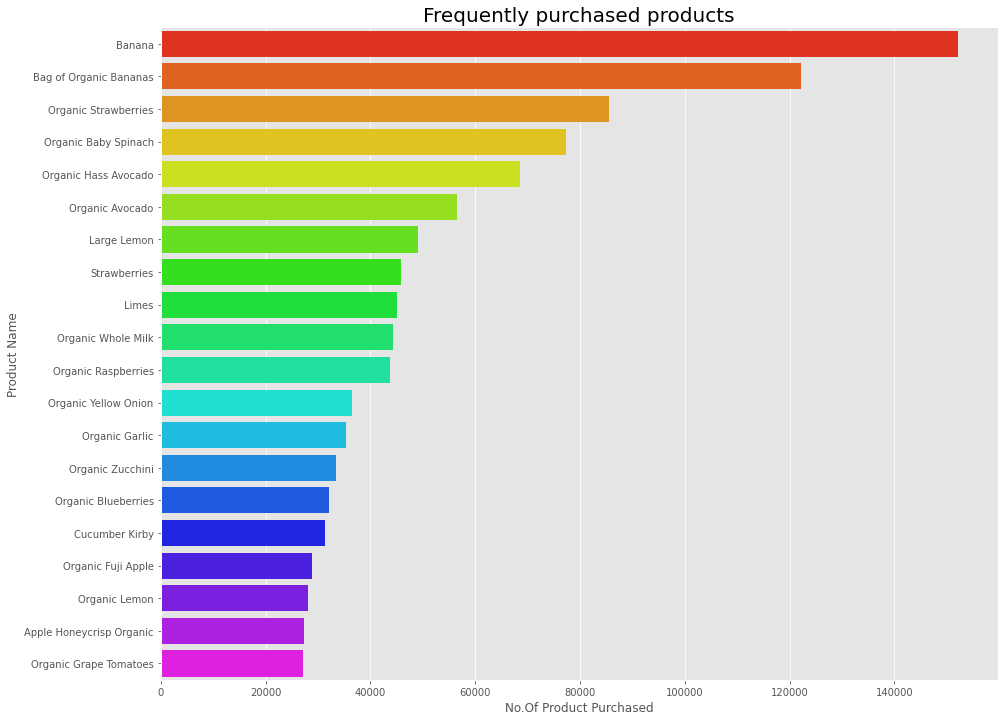

In [61]:
rcParams['figure.figsize'] = 15,12
sns.barplot(x=Frequent_Purchased_Product['No.Of Product Purchased'][:20],y=Frequent_Purchased_Product['Product Name'][:20],palette='gist_rainbow')
plt.title('Frequently purchased products',fontsize=20)
plt.show()

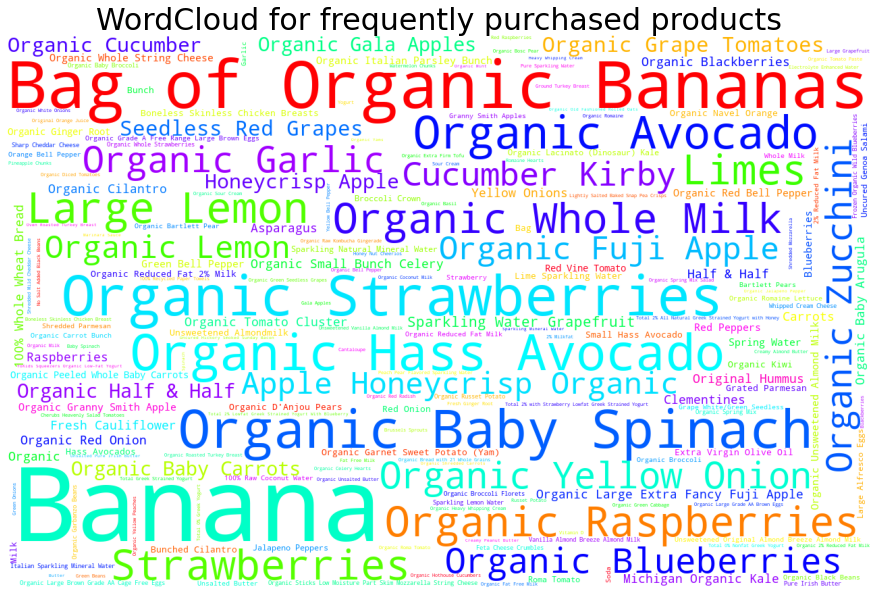

In [62]:
order_product_name = list(order_products_prior['product_name'].astype(str).values)
order_product_name_word_list = []
for lista in [c.split(',') for c in order_product_name]:
    for word in lista:
        order_product_name_word_list.append(word.strip())
        

order_product_name_wc_dict = Counter(order_product_name_word_list)

wordcloud = WordCloud(width=1280, height=820, collocations=False, random_state=42, 
                      colormap='gist_rainbow', background_color='white').generate_from_frequencies(order_product_name_wc_dict)

# plot the WordCloud image                        
plt.figure(figsize = (12, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('WordCloud for frequently purchased products',fontsize=30)
plt.show()

#fig, axs = plt.subplots(1, 2, figsize=(20, 12))
#ax1 = axs[0]
#ax2 = axs[1]
#ax1.imshow(wordcloud)
#ax1.axis('off')
#ax1.set_title('WordCloud for frequently purchased products', size=18, pad=20)
#sns.barplot(x=Frequent_Purchased_Product['No.Of Product Purchased'][:20],y=Frequent_Purchased_Product['product_name'][:20],palette='gist_ncar',ax=ax2)
#ax2.set_title("Frequently purchased products",size=20)
#plt.show()

In [63]:
Frequent_Purchased_Aisles=pd.DataFrame(order_products_prior['aisle'].value_counts()).reset_index()
Frequent_Purchased_Aisles.columns=['Aisles','No.Of Aisles Purchased']
Frequent_Purchased_Aisles.sort_values(by='No.Of Aisles Purchased',ascending=False,inplace=True)
#Frequent_Purchased_Aisles=Frequent_Purchased_Aisles.reset_index()
Frequent_Purchased_Aisles

,Aisles,No.Of Aisles Purchased
0,fresh fruits,1170791
1,fresh vegetables,1097378
2,packaged vegetables fruits,567434
3,yogurt,466618
4,packaged cheese,314401
...,...,...
129,eye ear care,2880
130,baby bath body care,2716
131,baby accessories,2589
132,beauty,1962


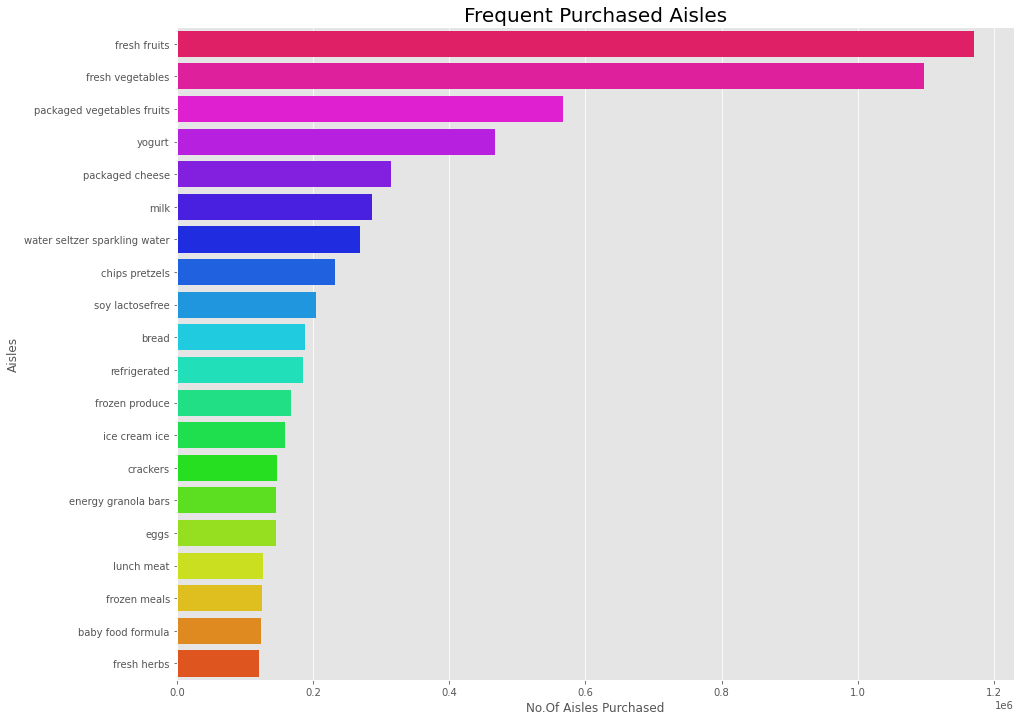

In [64]:
rcParams['figure.figsize'] = 15,12
sns.barplot(x=Frequent_Purchased_Aisles['No.Of Aisles Purchased'][:20],y=Frequent_Purchased_Aisles['Aisles'][:20],palette='hsv_r')
plt.title('Frequent Purchased Aisles',fontsize=20)
plt.show()

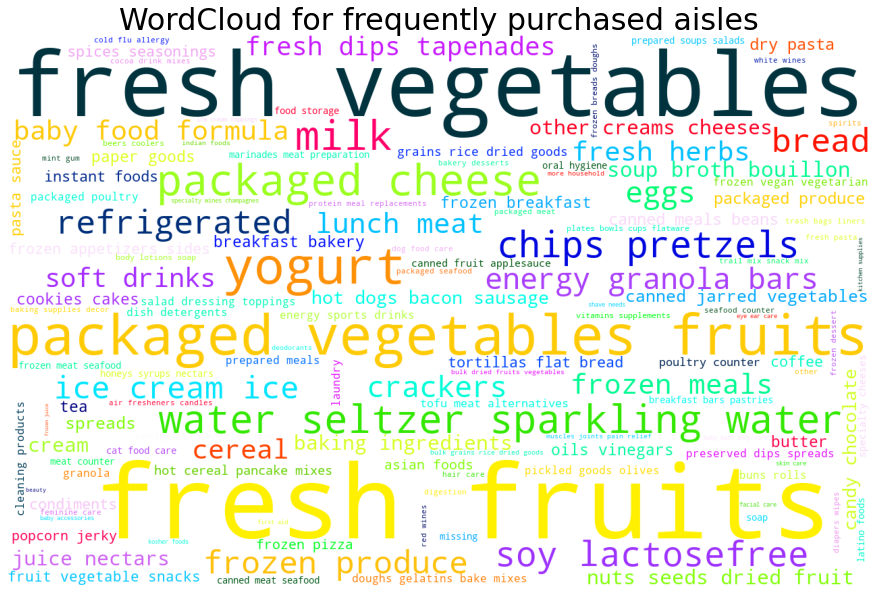

In [65]:
order_aisle = list(order_products_prior['aisle'].astype(str).values)
order_aisle_word_list = []
for lista in [c.split(',') for c in order_aisle]:
    for word in lista:
        order_aisle_word_list.append(word.strip())
        

order_aisle_wc_dict = Counter(order_aisle_word_list)

wordcloud = WordCloud(width=1280, height=820, collocations=False, random_state=42, 
                      colormap='gist_ncar', background_color='white').generate_from_frequencies(order_aisle_wc_dict)

# plot the WordCloud image                        
plt.figure(figsize = (12, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('WordCloud for frequently purchased aisles',fontsize=30)
plt.show()

In [66]:
Most_Popular_Departments=pd.DataFrame(order_products_prior['department'].value_counts())
Most_Popular_Departments.columns=['popular department']
Most_Popular_Departments.sort_values(by='popular department',ascending=False,inplace=True)
Most_Popular_Departments=Most_Popular_Departments.reset_index()
Most_Popular_Departments

,index,popular department
0,produce,3045904
1,dairy eggs,1739041
2,snacks,927840
3,beverages,862564
4,frozen,716805
5,pantry,601220
6,bakery,377470
7,canned goods,342064
8,deli,337677
9,dry goods pasta,278403


In [67]:
Most_Popular_Departments.rename(columns={'index':'popular department','popular department':'count'},inplace=True)
Most_Popular_Departments

,popular department,count
0,produce,3045904
1,dairy eggs,1739041
2,snacks,927840
3,beverages,862564
4,frozen,716805
5,pantry,601220
6,bakery,377470
7,canned goods,342064
8,deli,337677
9,dry goods pasta,278403


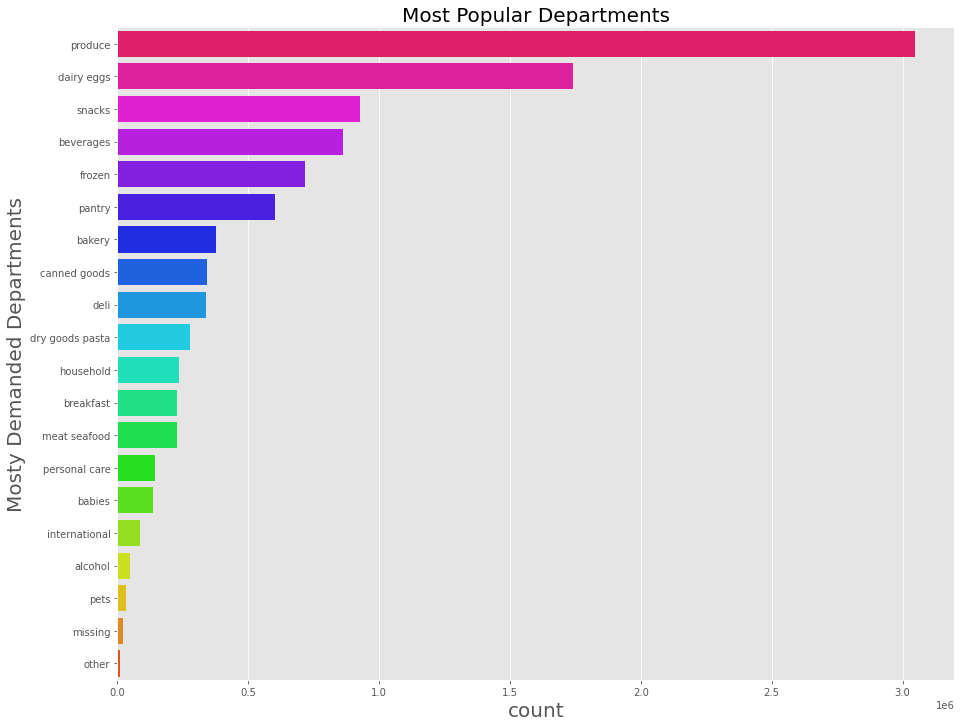

In [68]:
rcParams['figure.figsize'] = 15,12
sns.barplot(x=Most_Popular_Departments['count'][:20],y=Most_Popular_Departments['popular department'][:20],palette='hsv_r')
plt.title('Most Popular Departments',fontsize=20)
plt.ylabel('Mosty Demanded Departments',fontsize=20)
plt.xlabel('count',fontsize=20)
plt.show()

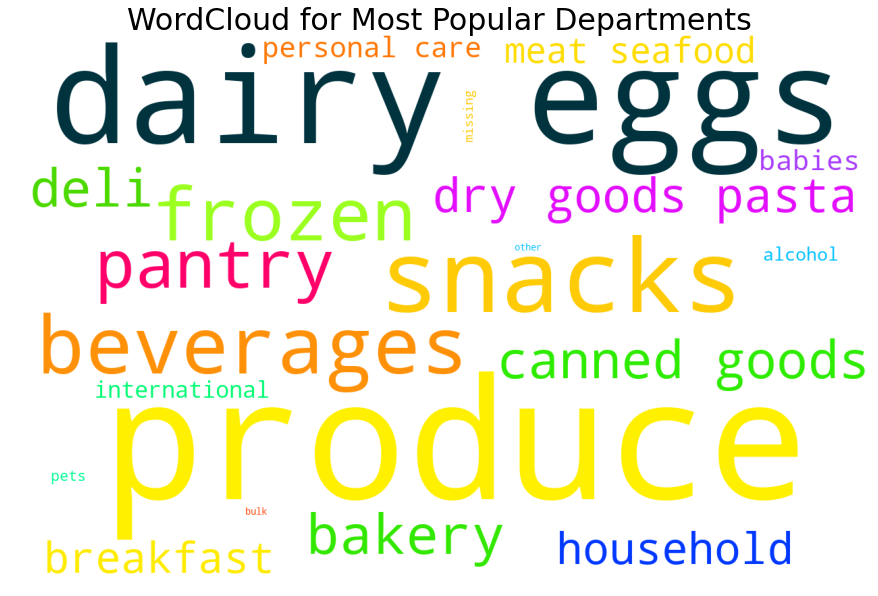

In [69]:
order_department = list(order_products_prior['department'].astype(str).values)
order_department_word_list = []
for lista in [c.split(',') for c in order_department]:
    for word in lista:
        order_department_word_list.append(word.strip())
        

order_department_wc_dict = Counter(order_department_word_list)

wordcloud1 = WordCloud(width=1280, height=820, collocations=False, random_state=42, 
                      colormap='gist_ncar', background_color='white').generate_from_frequencies(order_department_wc_dict)

# plot the WordCloud image                        
plt.figure(figsize = (12, 10), facecolor = None) 
plt.imshow(wordcloud1) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('WordCloud for Most Popular Departments',fontsize=30)
plt.show()

In [70]:
order_products_prior['reordered'].mean()

0.589648144160646

In [71]:
reorered_proportion=order_products_prior.reordered.value_counts()/order_products_prior.shape[0]

In [72]:
reorered_proportion

1.0    0.589648
0.0    0.410352
Name: reordered, dtype: float64

In [73]:
colors = ['#FF0099', '#FFFF33']
colors_1 = ['#9900CC', '#00CCFF']

from plotly.subplots import make_subplots
fig= make_subplots(rows=1, cols=2,shared_xaxes=False,specs=[[{"type": "pie"}, {"type": "bar"}]])

fig.add_trace(go.Pie(labels=reorered_proportion.index,values=reorered_proportion.values,textinfo='percent+label',name='',
            marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2))),row=1,col=1)
fig.add_trace(go.Bar(x=reorered_proportion.index,y=reorered_proportion.values,name='',
                         marker=dict(color=colors_1,line=dict(color='#000000', width=2))),
                          row=1,col=2)
fig.update_layout(title="Proportion OF Reordering",xaxis_title="Reordered",yaxis_title="Reorder Proportion" ,width=1000,height=500,showlegend=True)
fig.show()

In [74]:
order_products_prior.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department'],
      dtype='object')

In [75]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1.0,1.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2.0,1.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3.0,0.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4.0,1.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5.0,0.0,Natural Sweetener,17,13,baking ingredients,pantry


In [76]:
pr1=pd.DataFrame(order_products_prior.groupby(['product_name'])['add_to_cart_order'].aggregate("mean")).reset_index()
pr1

,product_name,add_to_cart_order
0,#2 Coffee Filters,9.244813
1,#2 Cone White Coffee Filters,9.285714
2,#2 Mechanical Pencils,3.000000
3,#4 Natural Brown Coffee Filters,10.378049
4,& Go! Hazelnut Spread + Pretzel Sticks,12.764706
...,...,...
48614,with Xylitol Unwrapped Original Flavor 50 Stic...,6.250000
48615,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,8.681818
48616,with Xylitol Watermelon Twist 18 Sticks Sugar ...,5.086957
48617,with a Splash of Mango Coconut Water,19.428571


In [77]:
#pr1['add_to_cart_order']=1/pr1['add_to_cart_order']
pr1.sort_values(by='add_to_cart_order',ascending=False,inplace=True)
pr1

,product_name,add_to_cart_order
17421,Gold Bears,61.0
26178,Natural Blueberries Covered In Dark Chocolate,59.0
8853,Citronge Extra Fine Orange Liqueur,53.0
30439,Organic Petite Creme Mon Cherry Amour Yogurt,50.0
42054,Strawberry Energy Gel,50.0
...,...,...
40072,Smart Mix Variety Pack,1.0
5015,Bogota Blackberry Lime Sparkling Antioxidant I...,1.0
27052,Nourishing Shampoo,1.0
31568,Organic Vanilla Hemp Shake,1.0


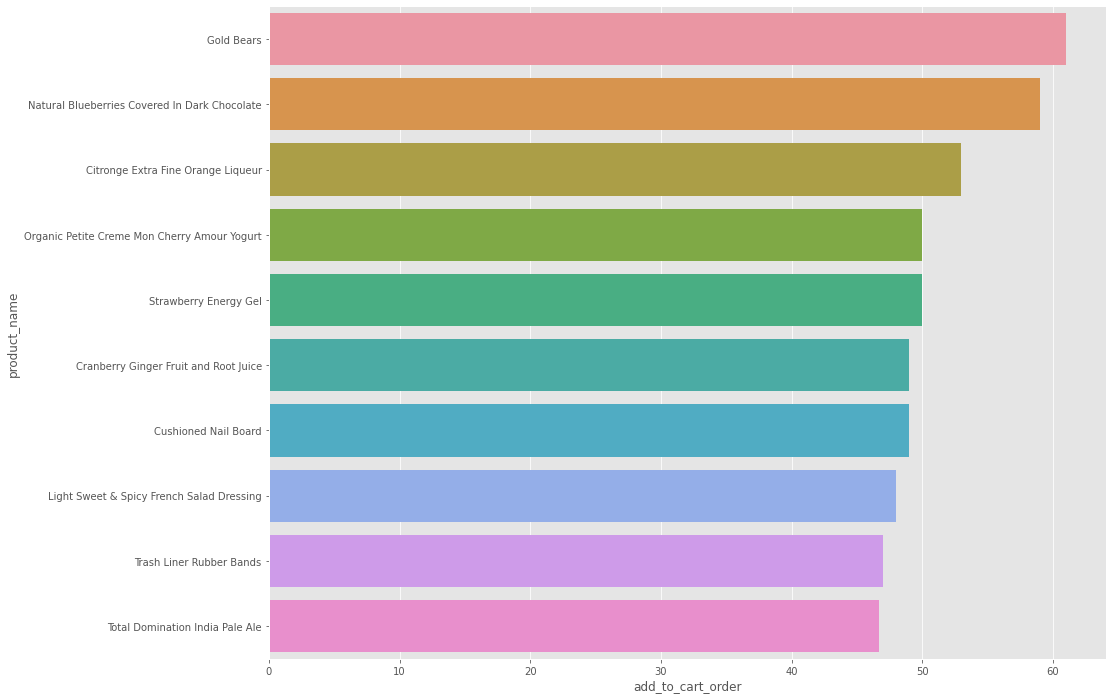

In [81]:
sns.barplot(x=pr1['add_to_cart_order'][:10],y=pr1['product_name'][:10])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



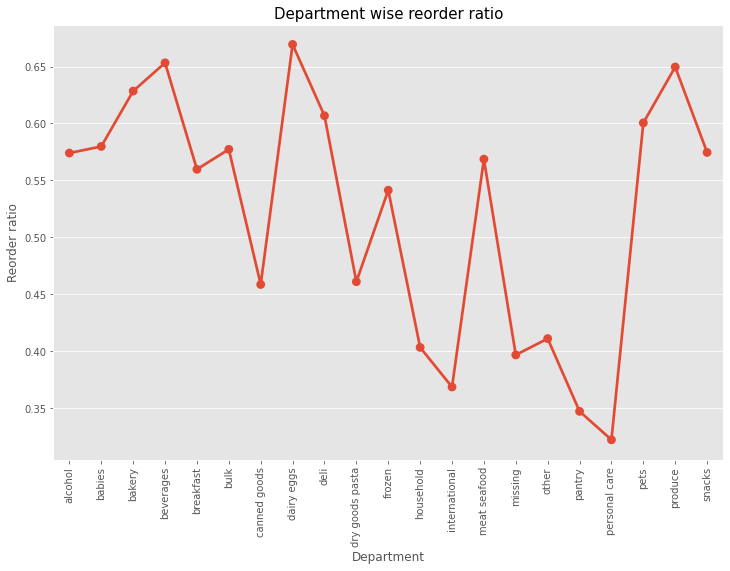

In [226]:
grouped_department = order_products_prior.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(grouped_department['department'].values, grouped_department['reordered'].values, alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



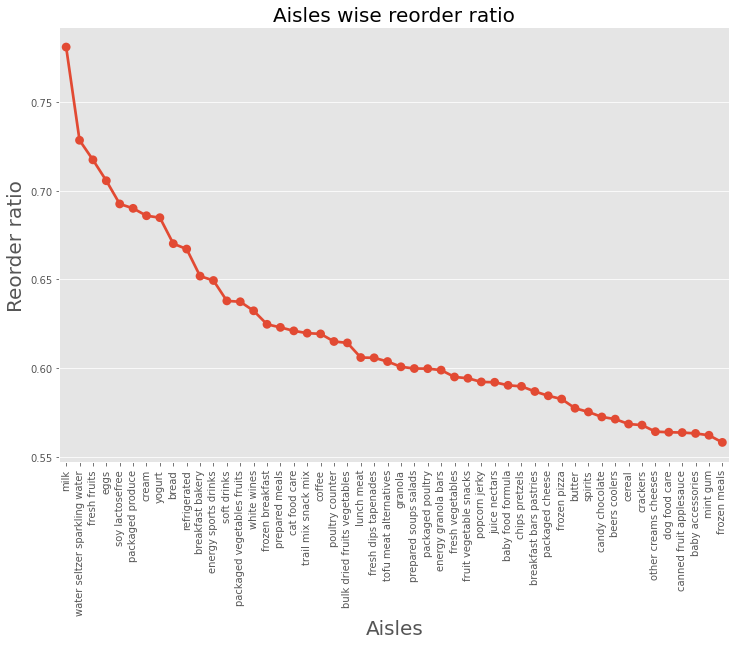

In [236]:
grouped_aisles = order_products_prior.groupby(["aisle"])["reordered"].aggregate("mean").reset_index()
grouped_aisles.sort_values(by='reordered',ascending=False,inplace=True)
plt.figure(figsize=(12,8))
sns.pointplot(grouped_aisles['aisle'].values[:50], grouped_aisles['reordered'].values[:50], alpha=0.8)
plt.ylabel('Reorder ratio', fontsize=20)
plt.xlabel('Aisles', fontsize=20)
plt.title("Aisles wise reorder ratio", fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

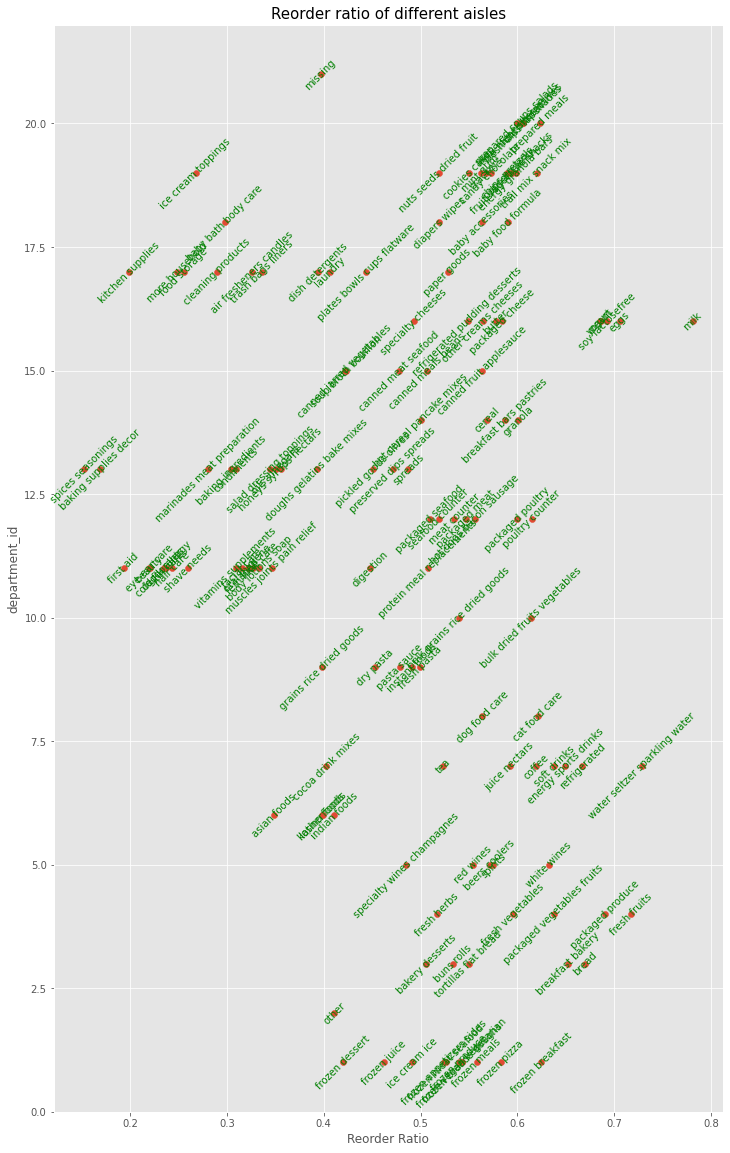

In [232]:
grouped_aisles = order_products_prior.groupby(["department_id", "aisle"])["reordered"].aggregate("mean").reset_index()

fig, ax = plt.subplots(figsize=(12,20))
ax.scatter(grouped_aisles.reordered.values, grouped_aisles.department_id.values)
for i, txt in enumerate(grouped_aisles.aisle.values):
    ax.annotate(txt, (grouped_aisles.reordered.values[i], grouped_aisles.department_id.values[i]), rotation=45, ha='center', va='center', color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title("Reorder ratio of different aisles", fontsize=15)
plt.show()


In [ ]:
order_product_train= pd.merge(order_product_train, orders, on='order_id', how='left')
order_product_train

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,Weekdays,Time Of Day,days_since_prior_order
0,1,49302,1,1,112108.0,train,4.0,Thursday,10.0,9.0
1,1,11109,2,1,112108.0,train,4.0,Thursday,10.0,9.0
2,1,10246,3,0,112108.0,train,4.0,Thursday,10.0,9.0
3,1,49683,4,0,112108.0,train,4.0,Thursday,10.0,9.0
4,1,43633,5,1,112108.0,train,4.0,Thursday,10.0,9.0
...,...,...,...,...,...,...,...,...,...,...
1384612,3421063,14233,3,1,NaN,NaN,NaN,NaN,NaN,NaN
1384613,3421063,35548,4,1,NaN,NaN,NaN,NaN,NaN,NaN
1384614,3421070,35951,1,1,139822.0,train,15.0,Saturday,10.0,8.0
1384615,3421070,16953,2,1,139822.0,train,15.0,Saturday,10.0,8.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


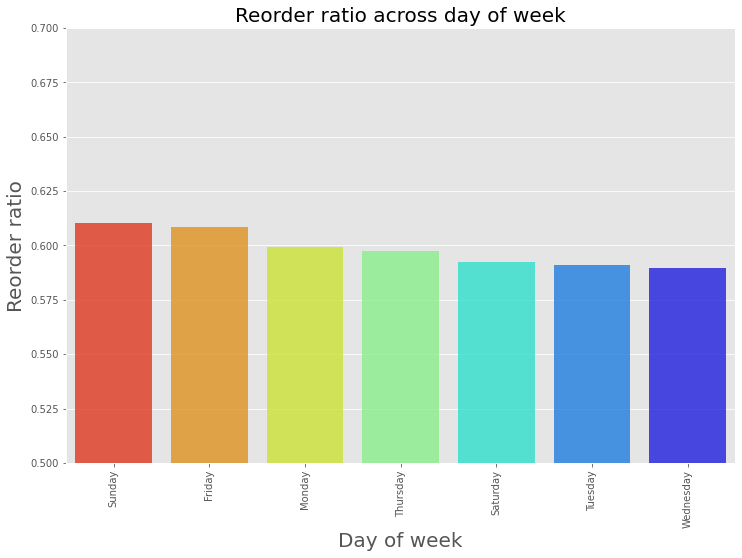

In [ ]:
grouped_df = pd.DataFrame(order_product_train.groupby(["Weekdays"])["reordered"].aggregate("mean")).reset_index()
grouped_df.sort_values(by='reordered',ascending=False,inplace=True)
plt.figure(figsize=(12,8))
sns.barplot(grouped_df['Weekdays'].values, grouped_df['reordered'].values, alpha=0.8,palette='jet_r')
plt.ylabel('Reorder ratio', fontsize=20)
plt.xlabel('Day of week', fontsize=20)
plt.title("Reorder ratio across day of week", fontsize=20)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


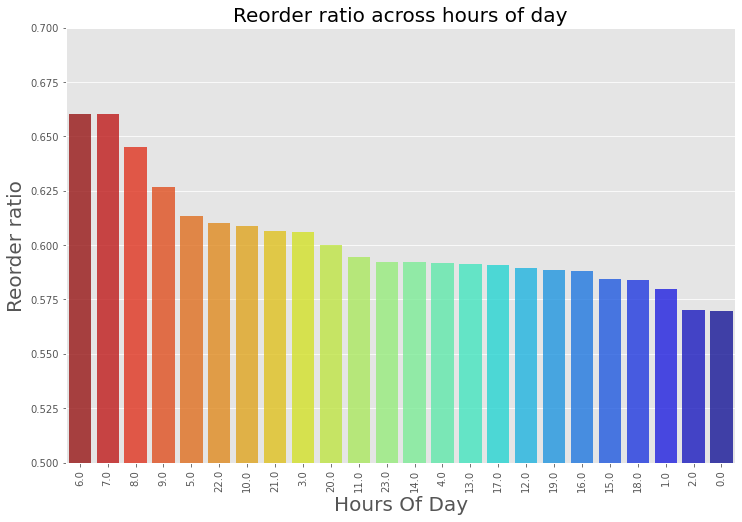

In [ ]:
grouped_df1 = pd.DataFrame(order_product_train.groupby(["Time Of Day"])["reordered"].aggregate("mean")).reset_index()
grouped_df1['Time Of Day']=grouped_df1['Time Of Day'].astype('str')
grouped_df1.sort_values(by='reordered',ascending=False,inplace=True)
plt.figure(figsize=(12,8))
sns.barplot(grouped_df1['Time Of Day'].values, grouped_df1['reordered'].values, alpha=0.8,palette='jet_r')
plt.ylabel('Reorder ratio', fontsize=20)
plt.xlabel('Hours Of Day', fontsize=20)
plt.title("Reorder ratio across hours of day", fontsize=20)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

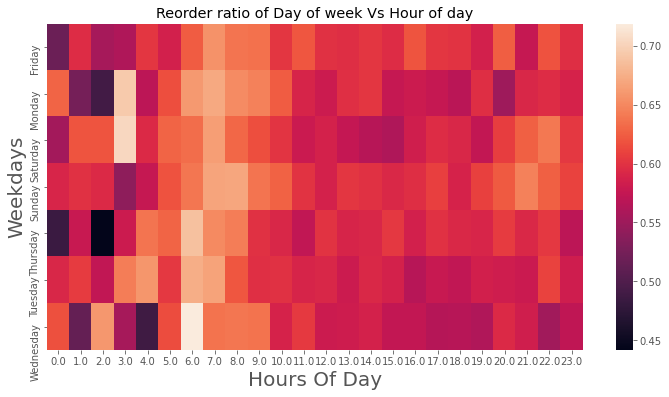

In [ ]:
grouped_df2 = order_product_train.groupby(["Weekdays", "Time Of Day"])["reordered"].aggregate("mean").reset_index()
grouped_df2 = grouped_df2.pivot('Weekdays','Time Of Day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df2)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.xlabel('Hours Of Day',fontsize=20)
plt.ylabel('Weekdays',fontsize=20)
plt.show()